In [1]:
'''Implementation of PMCMC to test on the OU Process'''

import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from particle_filter import filter
from models import OU_model
from pmcmc import PMCMC
from scipy.stats import norm,gamma,uniform,expon

In [2]:
rng = np.random.default_rng(10)

'''Generate an example dataset to perform inference on'''
lam = 1/10
m = 2. 
sig = 0.5

t_initial = 0
dt = 0.01
t_final = 100+dt
t_vector = np.arange(t_initial, t_final, dt).T

x_vector = np.zeros(len(t_vector))
x_vector[0] = 0.5

dW = np.sqrt(dt) * rng.normal(size=(len(t_vector - 1),))
for t in range(1,len(t_vector)): 
    x_vector[t] = x_vector[t-1] - lam * (x_vector[t-1] - m) * dt + np.sqrt(2 * lam) * sig * dW[t]

data = np.real(x_vector[::int(1/dt)]) #data for PF, the real component of the simulated process

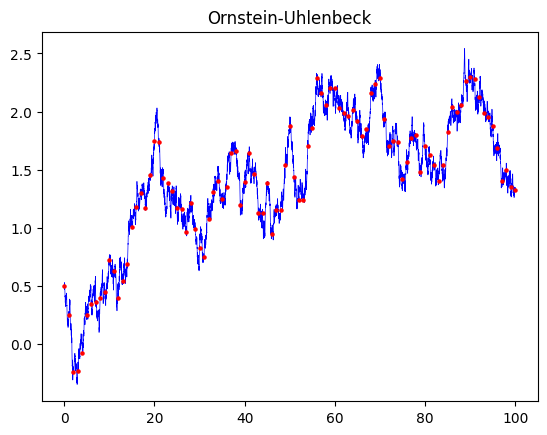

In [3]:
plt.title("Ornstein-Uhlenbeck")
plt.plot(t_vector, np.real(x_vector),color = 'blue',lw = 0.5)
plt.scatter(t_vector[::int(1/dt)],data,color = 'red',zorder = 12,s= 5.)
plt.show()

In [4]:

particles, weights,_ = filter(data = data,theta= (lam,m,sig),rng = rng,num_particles = 100,dt = dt,model = OU_model,model_dim = 1)


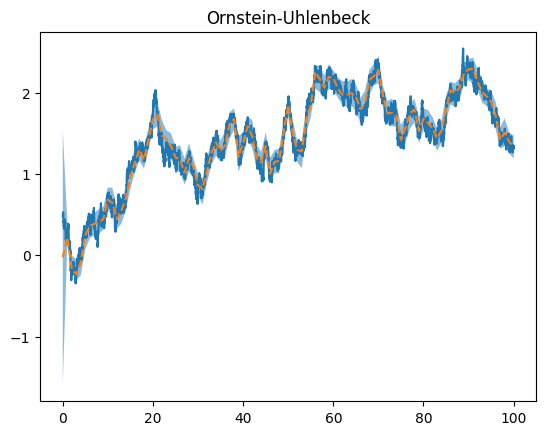

In [5]:
plt.title("Ornstein-Uhlenbeck")

plt.plot(t_vector, np.real(x_vector))
plt.plot(t_vector[::int(1/dt)],np.average(particles[:,0,:],weights=weights, axis = 0),'--')
plt.fill_between(t_vector[::int(1/dt)],np.percentile(particles[:,0,:],5,axis = 0),np.percentile(particles[:,0,:],95,axis = 0),alpha = 0.5)
plt.show()



In [6]:
iterations = 1000

num_particles = 100

prior = lambda x: expon.logpdf(x =(x[0]), scale = 5.) +\
     norm.logpdf(x = x[1], scale = 50.) + \
        expon.logpdf(x = x[2],scale = 5.)

theta, LL = PMCMC(iterations=iterations,
                  num_particles=num_particles,
                  init_theta=np.array([1.,2.,2.]),
                  data = data,
                  rng = rng,
                  dt = dt, 
                  prior = prior, 
                  model = OU_model,
                  model_dim=1)





iteration: 10| Acceptance rate: 0.2| Log-Likelihood: -148.36661528631453
iteration: 20| Acceptance rate: 0.2| Log-Likelihood: -129.89941251187787
iteration: 30| Acceptance rate: 0.16666666666666666| Log-Likelihood: -116.46599915652807
iteration: 40| Acceptance rate: 0.15| Log-Likelihood: -49.015153539900666
iteration: 50| Acceptance rate: 0.14| Log-Likelihood: -8.765614507649888
iteration: 60| Acceptance rate: 0.11666666666666667| Log-Likelihood: -8.765614507649888
iteration: 70| Acceptance rate: 0.1| Log-Likelihood: -8.765614507649888
iteration: 80| Acceptance rate: 0.0875| Log-Likelihood: -8.765614507649888
iteration: 90| Acceptance rate: 0.07777777777777778| Log-Likelihood: -8.765614507649888
iteration: 100| Acceptance rate: 0.07| Log-Likelihood: -8.765614507649888
iteration: 110| Acceptance rate: 0.06363636363636363| Log-Likelihood: -8.765614507649888
iteration: 120| Acceptance rate: 0.058333333333333334| Log-Likelihood: -8.765614507649888
iteration: 130| Acceptance rate: 0.0538461

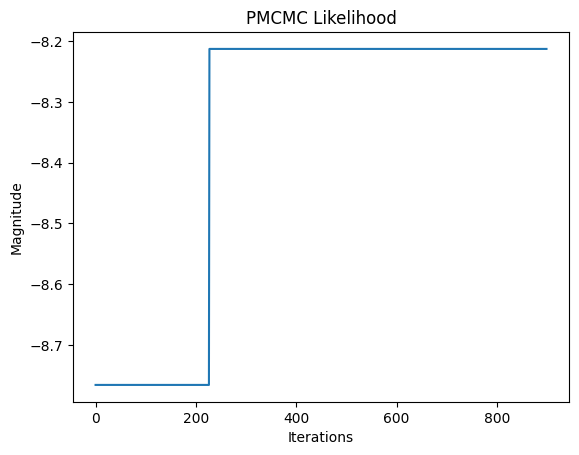

In [9]:
burn_in = int(iterations/10)

plt.title("PMCMC Likelihood")
plt.ylabel("Magnitude")
plt.xlabel("Iterations")
plt.plot(LL[burn_in:])

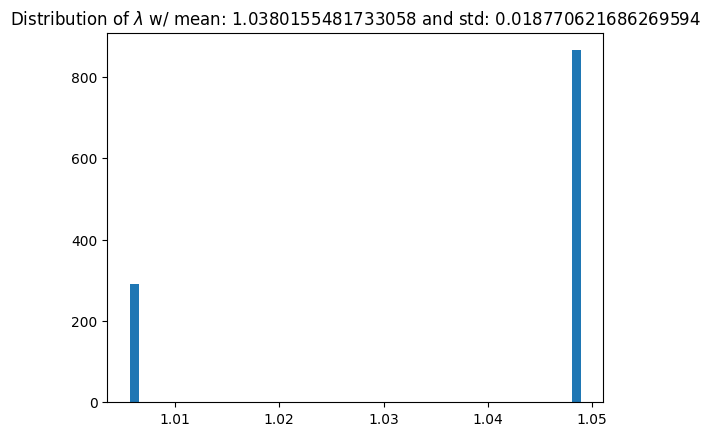

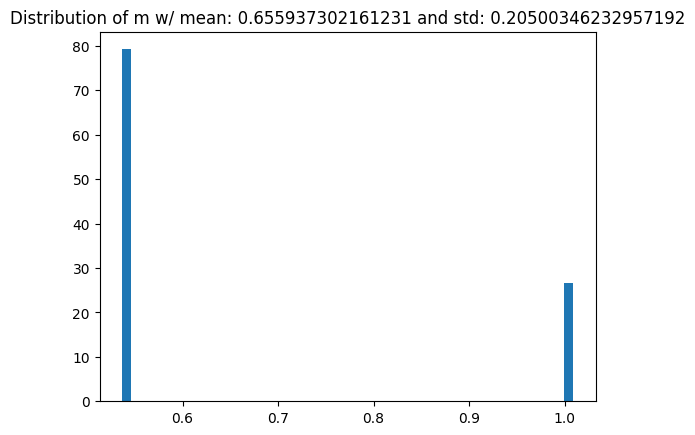

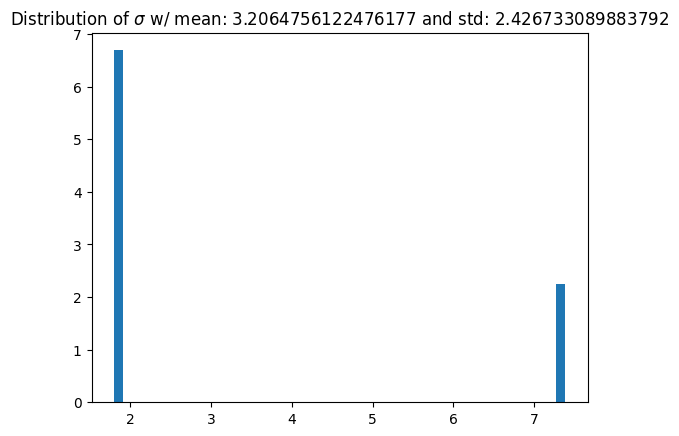

In [10]:


plt.title(f"Distribution of $\\lambda$ w/ mean: {np.mean(np.exp(theta[0,burn_in:]))} and std: {np.std(np.exp(theta[0,burn_in:]))}")
plt.hist(np.exp(theta[0,burn_in:]),density=True,bins = 50)
plt.show()

plt.title(f"Distribution of m w/ mean: {np.mean((theta[1,burn_in:]))} and std: {np.std((theta[1,burn_in:]))}")
plt.hist((theta[1,burn_in:]),density=True,bins = 50)
plt.show()

plt.title(f"Distribution of $\\sigma$ w/ mean: {np.mean(np.exp(theta[2,burn_in:]))} and std: {np.std(np.exp(theta[2,burn_in:]))}")
plt.hist(np.exp(theta[2,burn_in:]),density=True,bins = 50)
plt.show()
